In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import ra_dec2_hpid
from rubin_sim.scheduler.utils import EuclidOverlapFootprint

In [2]:
# generate the latest footprint
nside = 64
fpg = EuclidOverlapFootprint(nside=nside)
maps_arr, labels = fpg.return_maps()

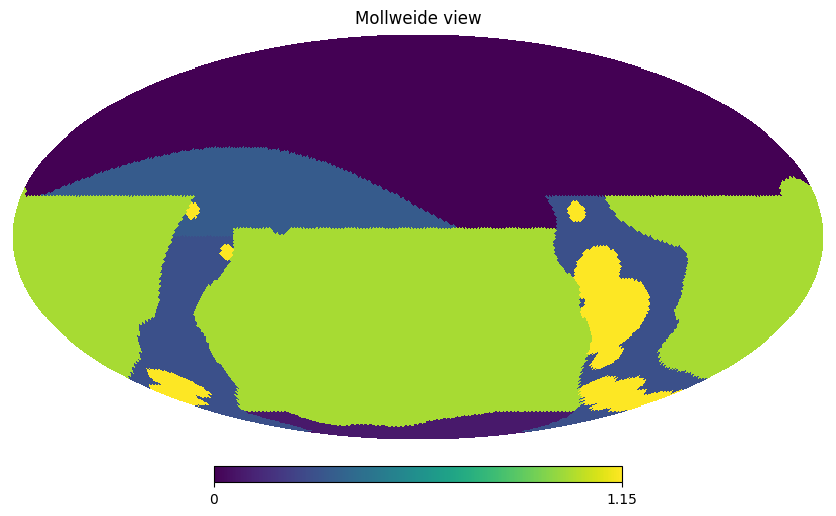

In [3]:
# look at the r-band
hp.mollview(maps_arr['r'])

In [4]:
# See if an RA, dec is in the footprint
ra = 90
dec = -15
# Find the healpixel of the ra,dec
hpid = ra_dec2_hpid(nside,ra, dec)

In [5]:
for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.32
g 0.4
r 1.0
i 1.0
z 0.9
y 0.9


In [6]:
# Check a spot in the NES
ra = 90
dec = 15
hpid = ra_dec2_hpid(nside,ra, dec)

for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.0
g 0.23
r 0.33
i 0.33
z 0.23
y 0.0


In [7]:
# So that spot will get observed in griz, but not in u or y.

In [8]:
# A spot north
ra = 90
dec = 45
hpid = ra_dec2_hpid(nside,ra, dec)

for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.0
g 0.0
r 0.0
i 0.0
z 0.0
y 0.0


In [9]:
# if we want to know if something is in WFD
np.unique(labels)

array(['', 'LMC_SMC', 'bulgy', 'dusty_plane', 'euclid_overlap', 'lowdust',
       'nes', 'scp', 'virgo'], dtype='<U20')

In [10]:
# Parts of the sky one could call WFD
wfd_pix = np.where((labels == 'lowdust') | (labels == "virgo") | (labels == "LMC_SMC"))[0]

In [11]:
hpid = ra_dec2_hpid(nside,90, 45)

hpid in wfd_pix

False

In [12]:
hpid = ra_dec2_hpid(nside,0, -15)
hpid in wfd_pix

True